# Lab 5 - Data Visualization

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
week3 = pd.read_csv("nfloffenseweek3.csv")
week4 = pd.read_csv("nfloffenseweek4.csv")
week5 = pd.read_csv("nfloffenseweek5.csv")
teams = pd.read_csv("nfl_teams.csv")

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

teams['Name'] = teams['Name'].replace(['NY Giants'], 'New York Giants')
teams['Name'] = teams['Name'].replace(['NY Jets'], 'New York Jets')
teams['Name'] = teams['Name'].replace(['Washington Football Team'], 'Washington Commanders')

In [23]:
teams.columns = ['ID','team','Abbreviation','Conference','Division']

"""
mergin on different named columns:

pd.merge(df1, df2, left_on='left_column_name', right_on='right_column_name')

"""

"\nmergin on different named columns:\n\npd.merge(df1, df2, left_on='left_column_name', right_on='right_column_name')\n\n"

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [24]:
from functools import reduce

week3.insert(2, "Week", 3)
week4.insert(2,"Week",4)
week5.insert(2,"Week",5)

#following code used from https://www.statology.org/pandas-merge-multiple-dataframes/
someDf = pd.concat([week3,week4,week5])

df = teams.merge(someDf, on="team")
df

df.columns = ['ID',"team",'Abbreviation','Conference','Division',"rank","Week","games","points_scored","total_yards","offensive_plays","yards_per_play","turnovers_lost","fumbles_lost","first_downs","passes_completed","passes_attempted","passing_yards","passing_touchdowns","passing_interceptions","net_yards_per_pass_attempt","passing_first_downs","rushing_attempts","rushing_yards","rushing_touchdowns","rushing_yards_per_attempt","rushing_first_downs","penalties","penalty_yards","first_down_penalties","percentage_scoring_drives","percentage_turnover_drives","expected_points"]
#df = df.drop([df.index[32],df.index[33],df.index[34]])


df.columns

Index(['ID', 'team', 'Abbreviation', 'Conference', 'Division', 'rank', 'Week',
       'games', 'points_scored', 'total_yards', 'offensive_plays',
       'yards_per_play', 'turnovers_lost', 'fumbles_lost', 'first_downs',
       'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_first_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_first_downs', 'penalties', 'penalty_yards',
       'first_down_penalties', 'percentage_scoring_drives',
       'percentage_turnover_drives', 'expected_points'],
      dtype='object')

2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

In [38]:
from matplotlib import label


plt.figure(figsize=(12, 12))

#fig, ax = plt.subplots()
barhplot = plt.barh(df.team, df.points_scored)



#I think the code below is correct, however, my version claims that there is no attribute by that name
#barhplot.bar_label(df.containers[0])

barhplot

ImportError: cannot import name 'label' from 'matplotlib' (c:\Users\Samf3\anaconda3\lib\site-packages\matplotlib\__init__.py)

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

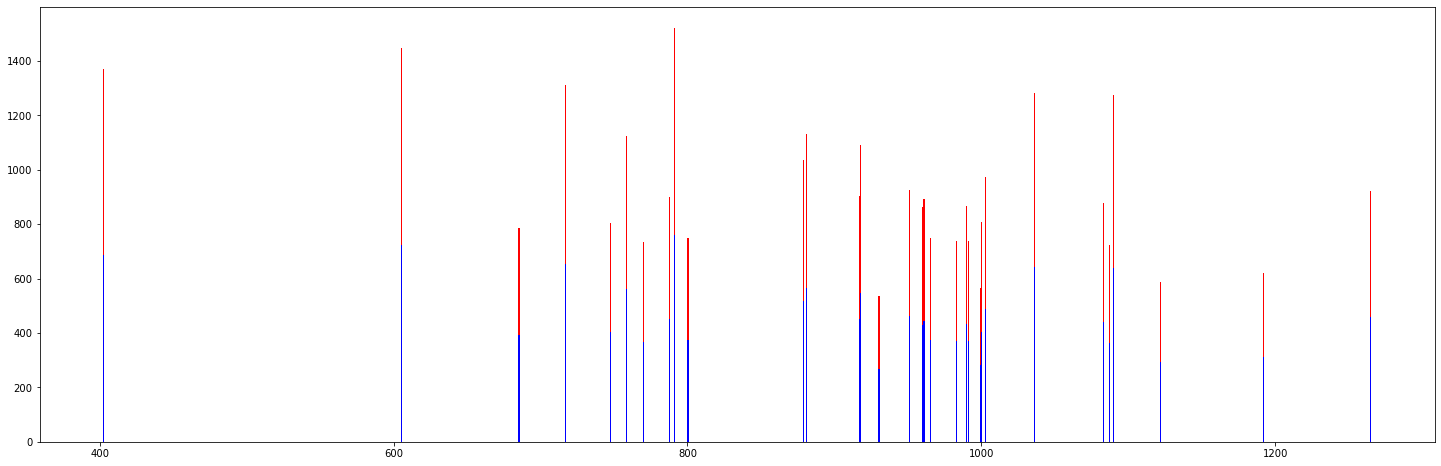

In [ ]:
plt.figure(figsize=(25, 8))


avgPass = df.groupby(['team']).passing_yards.mean()
avgRush = df.groupby(['team']).rushing_yards.mean()


plt.bar(avgPass, avgRush, color = 'b');
plt.bar(avgPass, avgRush, bottom = avgRush, color = 'r');



4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

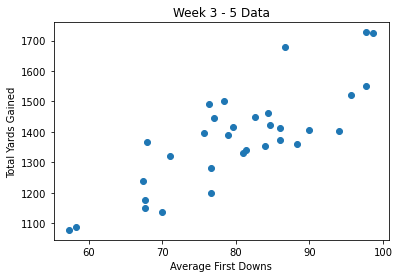

In [ ]:
avgYards = df.groupby('team').total_yards.mean()
avgFstDowns = df.groupby('team').first_downs.mean()

plt.title('Week 3 - 5 Data')
plt.xlabel('Average First Downs')
plt.ylabel('Total Yards Gained')

plt.scatter(avgFstDowns,avgYards);

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

In [31]:
ravenWeeks = df.groupby((df['team']) == 'Baltimore Ravens').penalty_yards


team   penalty_yards
False  100              2
       156              2
       159              2
       161              2
       165              2
                       ..
       376              1
       391              1
True   44               1
       114              1
       162              1
Name: penalty_yards, Length: 84, dtype: int64

In [ ]:
df.columns

Index(['ID', 'team', 'Abbreviation', 'Conference', 'Division', 'rank', 'Week',
       'games', 'points_scored', 'total_yards', 'offensive_plays',
       'yards_per_play', 'turnovers_lost', 'fumbles_lost', 'first_downs',
       'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_first_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_first_downs', 'penalties', 'penalty_yards',
       'first_down_penalties', 'percentage_scoring_drives',
       'percentage_turnover_drives', 'expected_points'],
      dtype='object')

6. Plot the average total points vs average yards per play for each team as a scatter chart (with total points on the y-axis and yards per play on the x-axis).

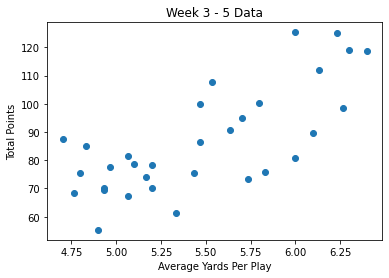

In [ ]:
avgPoints = df.groupby('team').points_scored.mean()
avgYPP = df.groupby('team').yards_per_play.mean()

plt.title('Week 3 - 5 Data')
plt.xlabel('Average Yards Per Play')
plt.ylabel('Total Points')

plt.scatter(avgYPP, avgPoints);

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

<BarContainer object of 12 artists>

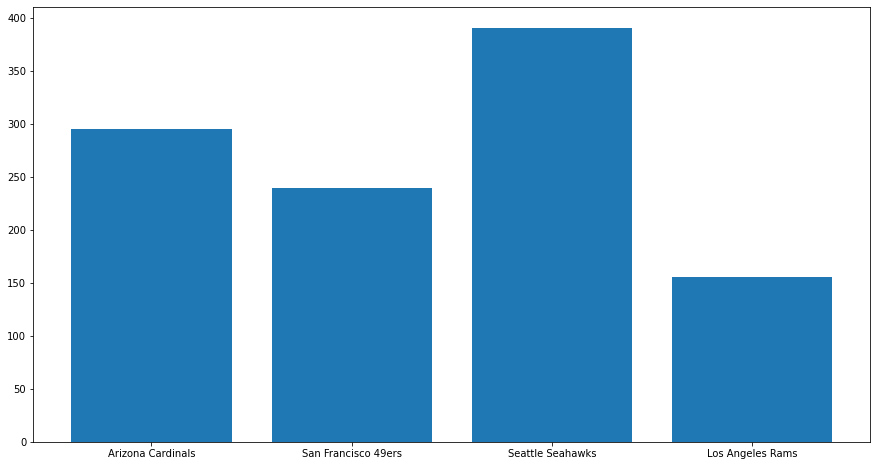

In [107]:
plt.figure(figsize=(15, 8))


NFCWest = df[ (df.Division == 'West') & (df.Conference == 'NFC')]
NFCWestTeams = NFCWest['team']



penYards = NFCWest.penalty_yards


plt.bar(NFCWestTeams,penYards)


In [52]:
df.columns

Index(['ID', 'team', 'Abbreviation', 'Conference', 'Division', 'rank', 'Week',
       'games', 'points_scored', 'total_yards', 'offensive_plays',
       'yards_per_play', 'turnovers_lost', 'fumbles_lost', 'first_downs',
       'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_first_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_first_downs', 'penalties', 'penalty_yards',
       'first_down_penalties', 'percentage_scoring_drives',
       'percentage_turnover_drives', 'expected_points'],
      dtype='object')

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)